# Examine the temporal dynamics over the training

In [1]:
import meta, examine

# ADAM 1 pretrain
An inverted U-shape relationship was found, when we examine the effect of varying the amount of pretrain on lesion models performance in ADAM.

In [2]:
cfg_json = '../../models/fast_pretrain_and_ramp_test/fast_pretrain_and_ramp_test_r0000/model_config.json'
cfg = meta.Config.from_json(cfg_json)
exam = examine.Examine(cfg)

Loaded config from ../../models/fast_pretrain_and_ramp_test/fast_pretrain_and_ramp_test_r0000/model_config.json


### Activation == 1

[None, None, None, None, None]

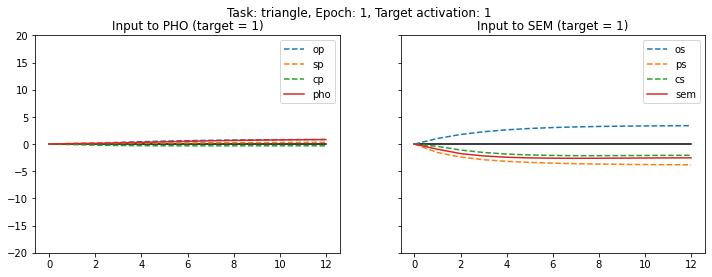

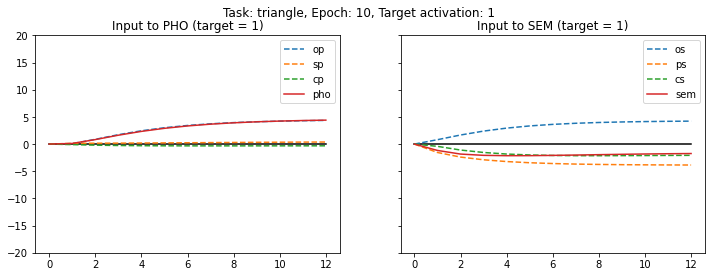

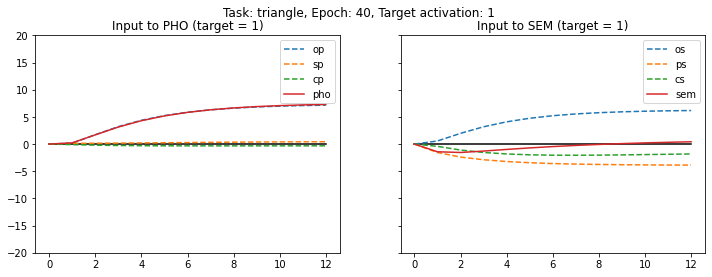

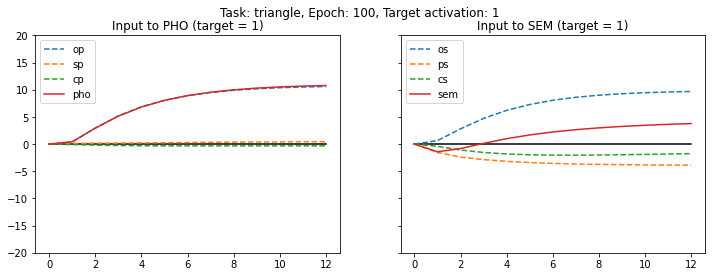

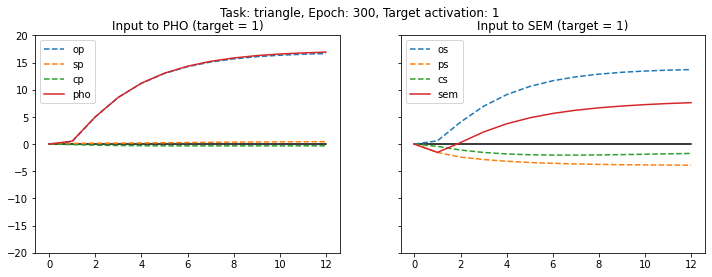

In [3]:
sel_epochs = [1, 10, 40, 100, 300]
[exam.plot_input(task='triangle', epoch=x, act=1) for x in sel_epochs]

- In gerneral, at PHO output, lesion OP should works like Intact in the ON nodes
- CS, PS tends to turn off SEMANTIC NODES wrongly. 

### Activation == 0

[None, None, None, None, None]

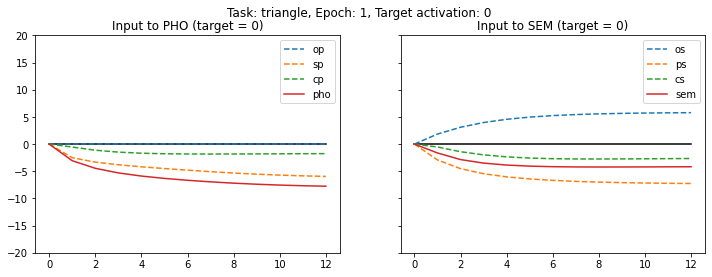

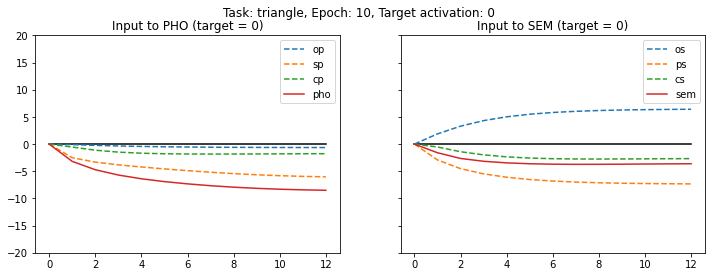

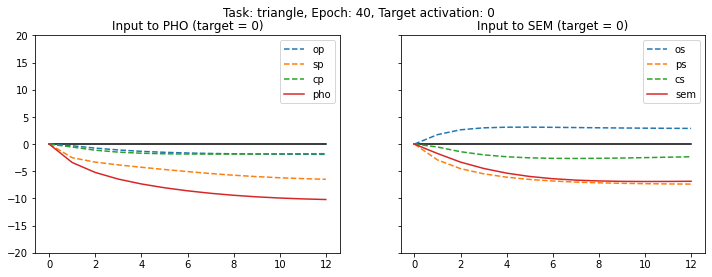

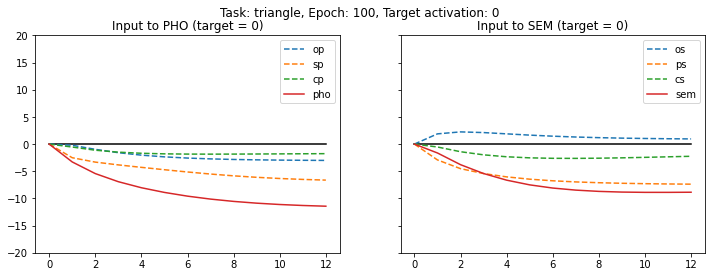

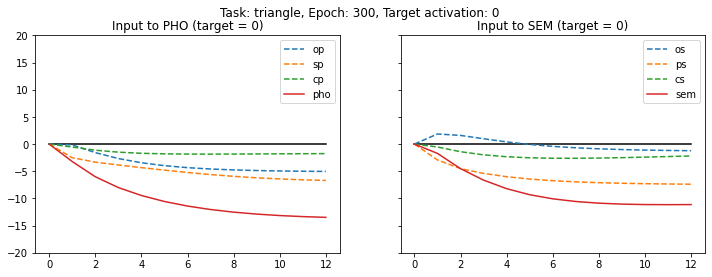

In [4]:
sel_epochs = [1, 10, 40, 100, 300]
[exam.plot_input(task='triangle', epoch=x, act=0) for x in sel_epochs]

- OS need a longer time (after epoch 100+), to know how to turn the node OFF. 
- OP should be ok??? But the actual leasion performance are zero. 
- Examine OP predictions

In [5]:
import pandas as pd
df = pd.read_csv(f"{cfg.eval_folder}/train_r100_ort_pho.csv")
print(df.loc[(df.timetick==12) & (df.epoch==300), 'pho_pred'].sample(10))

48040    C^Jipsw_ir
48096    C^fAndz_er
48088    C^yvn_w_tr
48006    C^lus_w_ir
48022    Cgrif_w_ir
48037    C^dEntw_ir
48068    Ckrez_C_er
48029    C^lin_w_ir
48074    strIngw_ir
48048    C^pIksw_er
Name: pho_pred, dtype: object


- There are something weird in slot 0,1,7,8,9.
- Some node are not suppose to be turned ON... Let's examine, on targets at slot 1. 

[None, None, None, None, None]

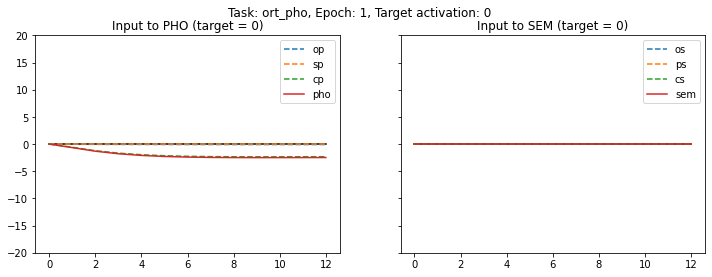

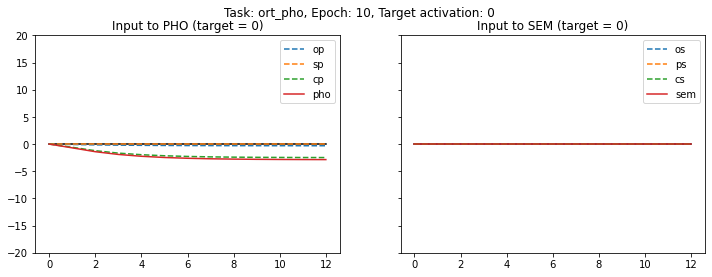

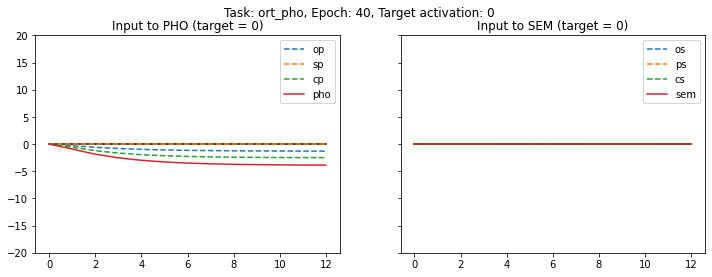

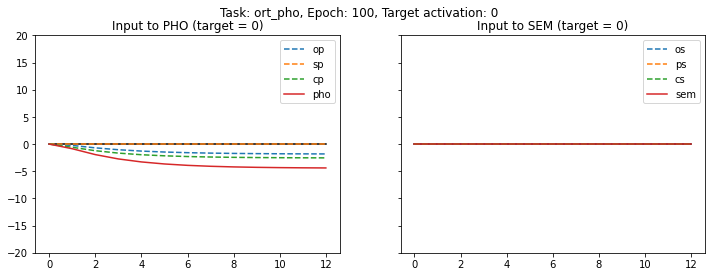

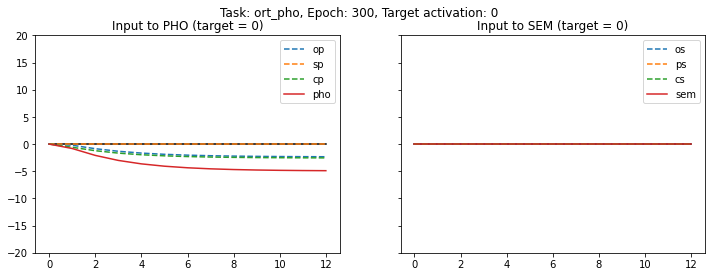

In [6]:
sel_epochs = [1, 10, 40, 100, 300]
[exam.plot_input(task='ort_pho', epoch=x, act=0, pho_units=list(range(25))) for x in sel_epochs]

/home/jal21012/triangle_model/src/examine.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

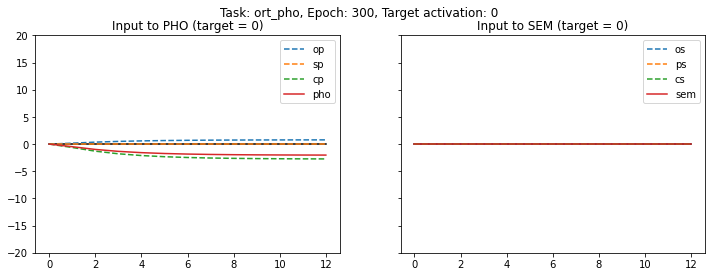

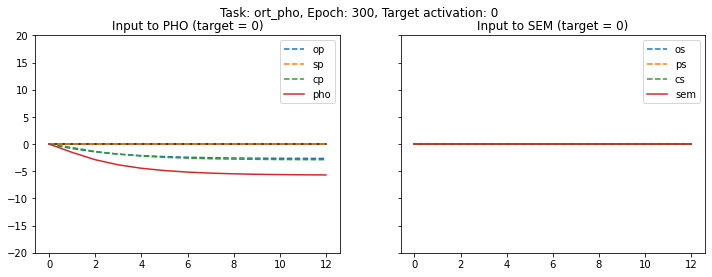

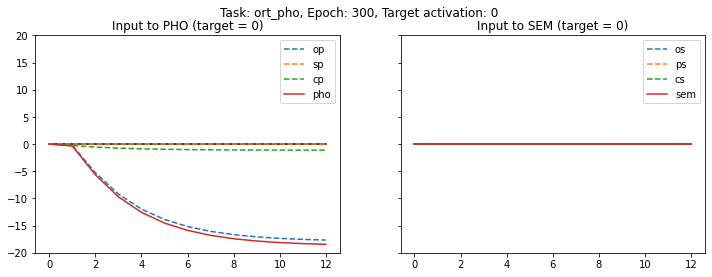

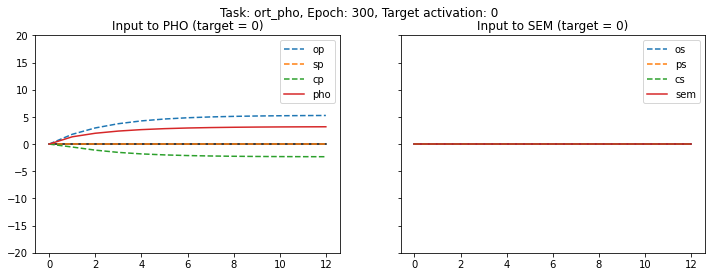

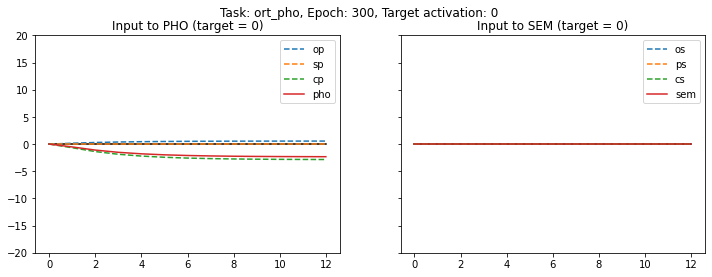

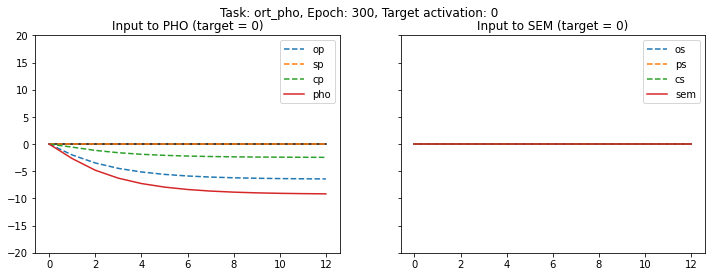

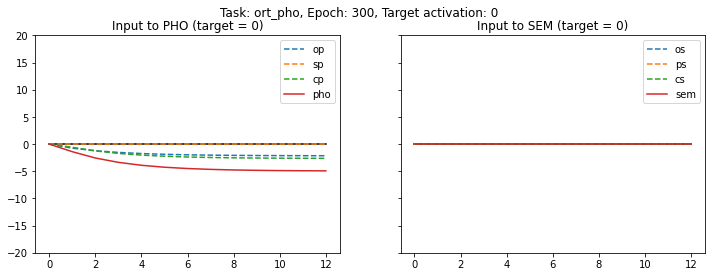

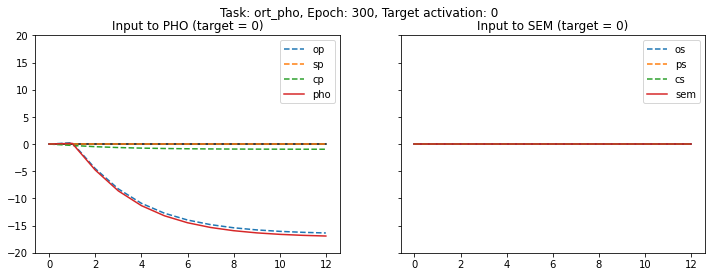

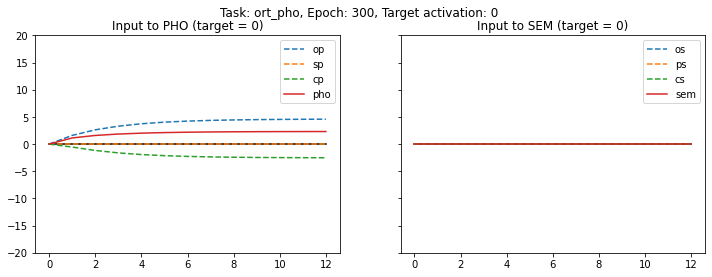

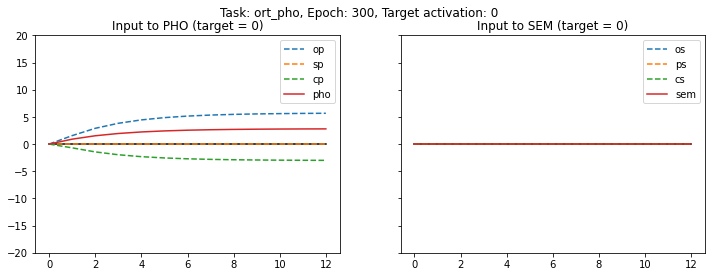

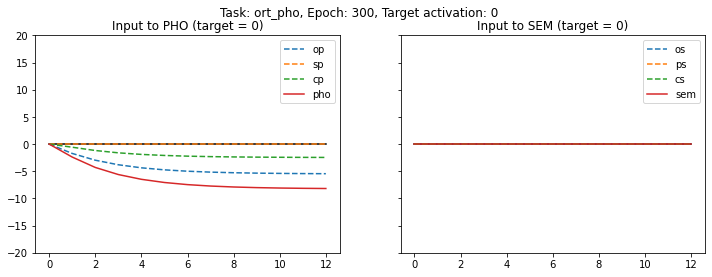

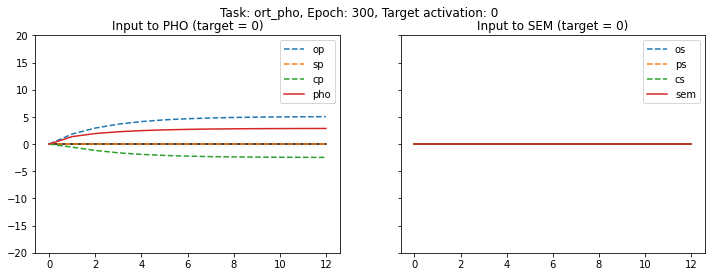

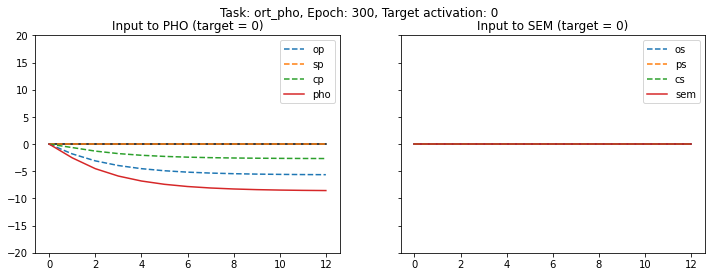

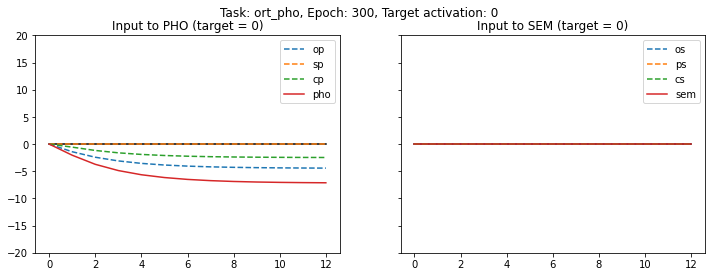

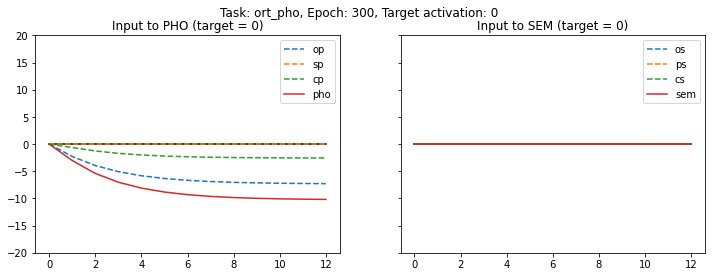

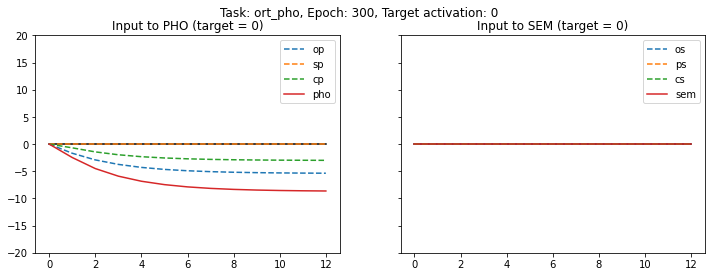

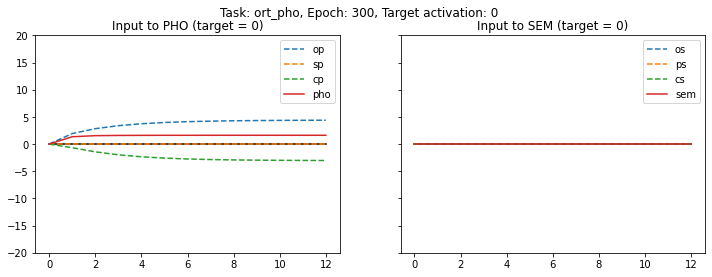

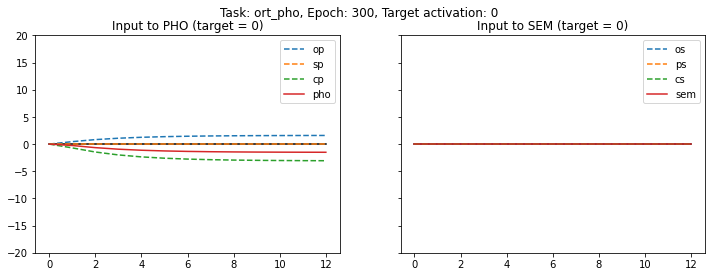

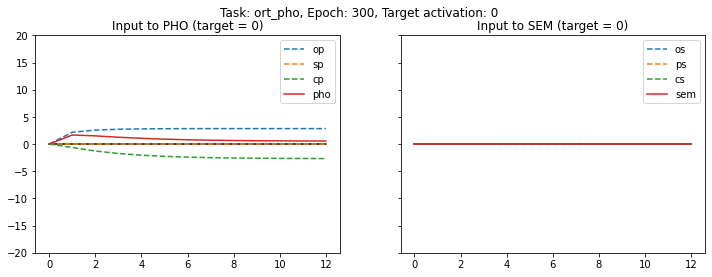

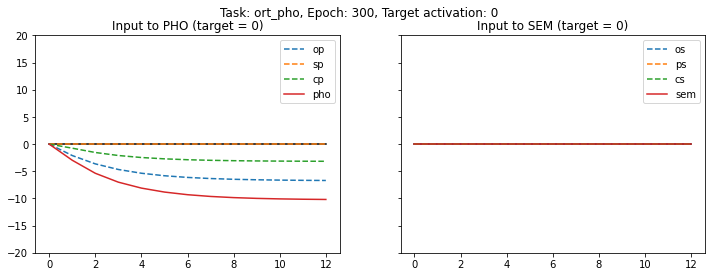

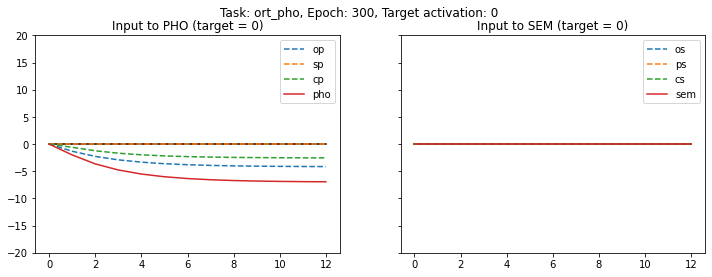

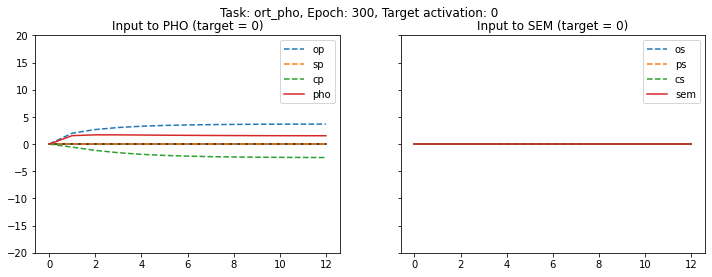

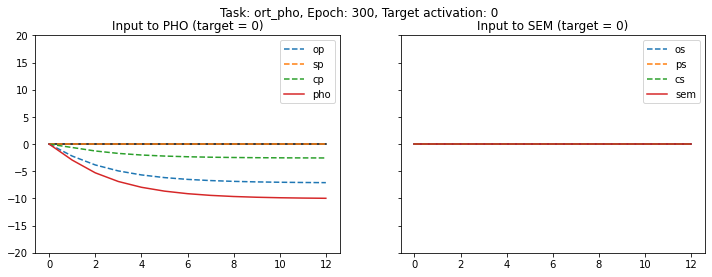

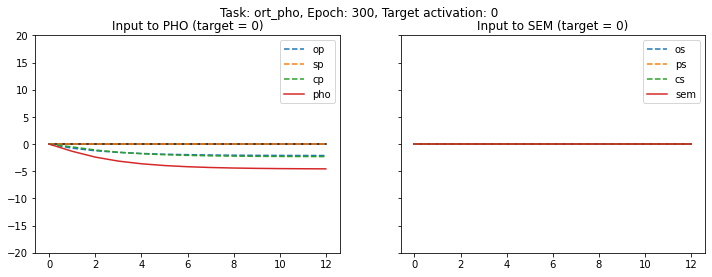

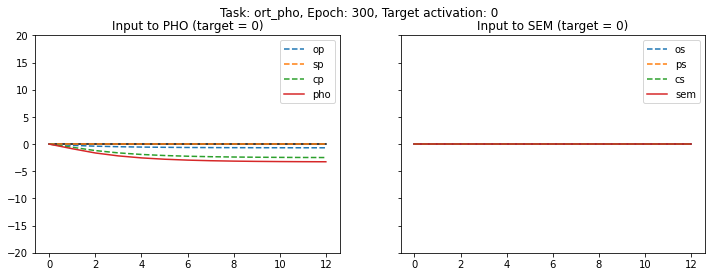

In [7]:
[exam.plot_input(task='ort_pho', epoch=300, act=0, pho_units=[u]) for u in range(25)]

- If we look at individual unit, some nodes are turned on by OP by mistake.

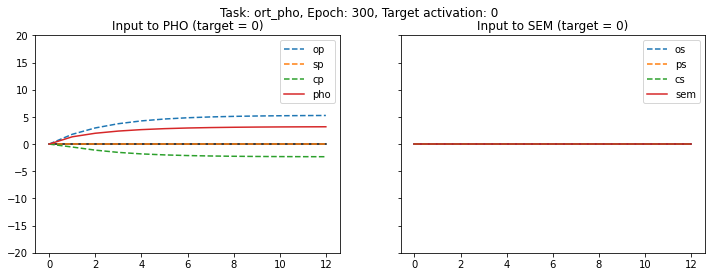

In [8]:
exam.plot_input(task='ort_pho', epoch=300, act=0, pho_units=[3])

- go back to intact for comparison. We can see node 3 OFF signal is mainly coming from SP.

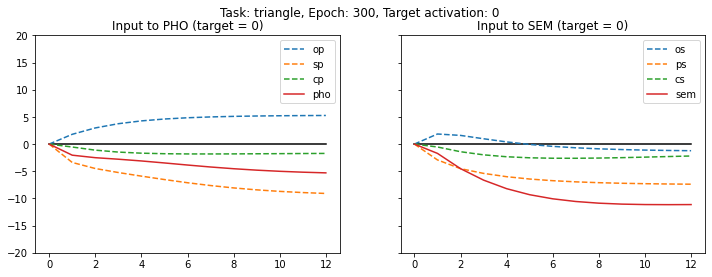

In [9]:
exam.plot_input(task='triangle', epoch=300, act=0, pho_units=[3])

## Summary ADAM 1.
- At PHO output, a handful of nodes are having a very strong negative input from SP (non-zero noise from SP), which caused the lesion model failed. 
    - A handful of nodes can change the prediction pattern drastically.
- At SEM output, the same problem not only appear in a few nodes. Most indirect input PS are very negative. It makes OS to turn ON the OFF nodes wrongly.  